 **Visualise** the contents of your DataFrames, **handle missing data values**, and **import data from and export data to CSV files**.

In [ ]:
import pandas as pd
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data Cleaning/dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Data Cleaning/dataset/homelessness.csv
/content/drive/MyDrive/Data Cleaning/dataset/sales_subset.csv
/content/drive/MyDrive/Data Cleaning/dataset/temperatures.csv
/content/drive/MyDrive/Data Cleaning/dataset/avoplotto.pkl


In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

avocados=pd.read_pickle("/content/drive/MyDrive/Data Cleaning/dataset/avoplotto.pkl")

# Look at the first few rows of data
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


In [ ]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


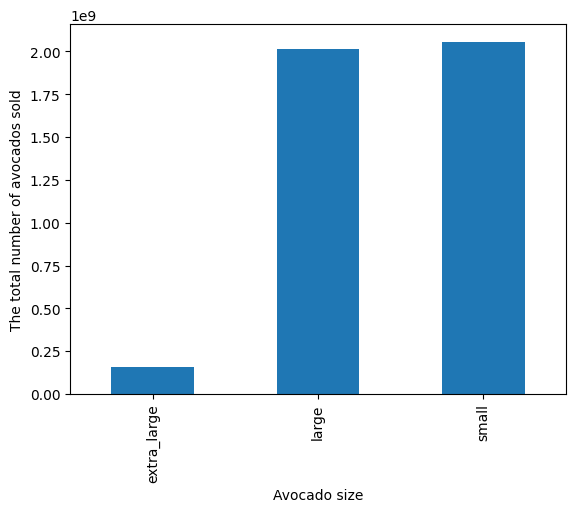

In [ ]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Add labels and title
plt.xlabel('Avocado size')
plt.ylabel('The total number of avocados sold')

# Show the plot
plt.show()

Changes in sales over time

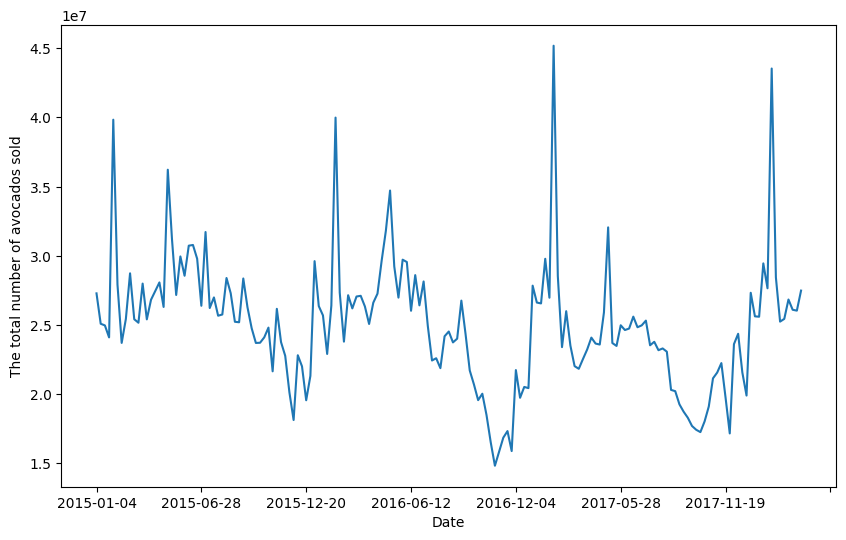

In [ ]:

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", figsize=(10, 6))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('The total number of avocados sold')

# Show the plot
plt.show()

Avocado supply and demand

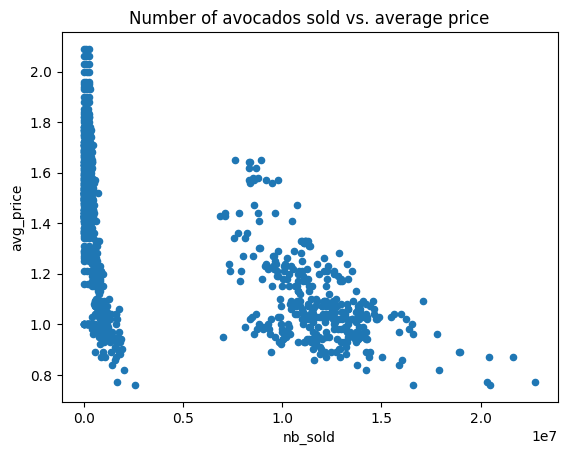

In [ ]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

Price of conventional vs. organic avocados

In [ ]:
avocados.columns

Index(['date', 'type', 'year', 'avg_price', 'size', 'nb_sold'], dtype='object')

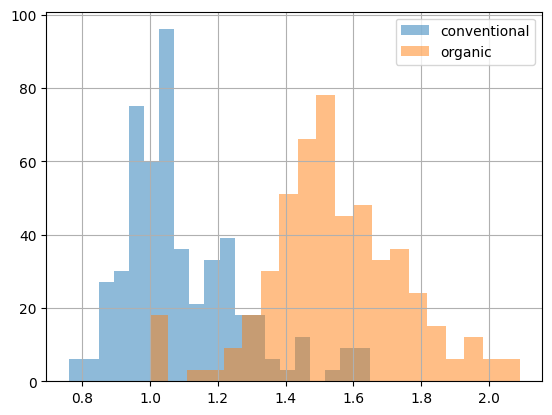

In [ ]:
"""
avocados[avocados["type"] == "conventional"]:
This selects a subset of the DataFrame avocados where the value in the "type" column
is equal to "conventional".
This is essentially filtering the DataFrame to include
only rows where the avocado type is "conventional".
"""
"""
["avg_price"]: This selects the "avg_price" column from the filtered subset of the DataFrame
obtained in the previous step.
It isolates the average price data for conventional avocados.
"""
"""
.hist(alpha=0.5, bins=20): This creates a histogram plot of the selected average price data.
The alpha parameter sets the transparency level of the histogram bars to 0.5 (50% transparent),
and the bins parameter specifies the number of bins to use for grouping the data.
In this case, it creates 20 bins for the histogram.

So, the overall meaning of the code is to visualize the distribution of average prices for conventional avocados
using a histogram plot with 20 bins, with the histogram bars having 50% transparency.
"""
# Histogram of conventional avg_price
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()

Finding missing values
.isna() .any()

In [19]:
avocados_2016=pd.read_pickle("/content/drive/MyDrive/Data Cleaning/dataset/avoplotto.pkl")
# Check individual values for missing values
print(avocados_2016.isna())

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]


       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


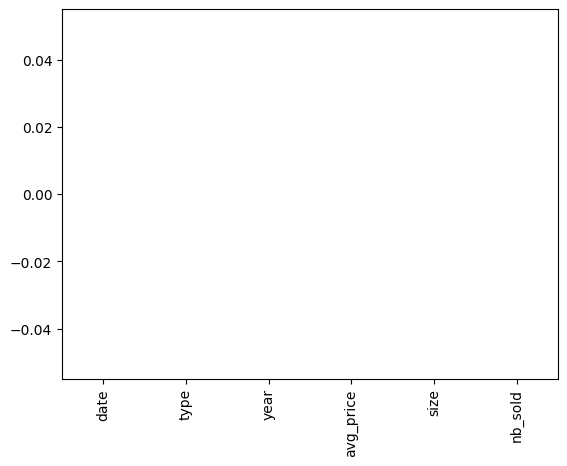

In [20]:
# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

Removing missing values

In [21]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


Replacing missing values

In [ ]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].plot(kind="hist")

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

Creating DataFrames¶
List of dictionaries

In [24]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


Dictionary of lists

In [25]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


CSV to DataFrame


Reading and writing CSVs

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped","total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")